In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Definir o caminho relativo para o arquivo de dados
file_path = '../sample_data/mammographic_masses.data.txt'

# Carregar e limpar os dados
col_names = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']
df = pd.read_csv(file_path, names=col_names, header=None, na_values='?')
df.dropna(inplace=True)

# Definir recursos e classes
features = ['age', 'shape', 'margin', 'density']
target = 'severity'

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=0)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Treinar o modelo
history = model.fit(X_train_scaled, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test_scaled, y_test))

# Avaliar o modelo
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.2f}')

Epoch 1/100
7/7 - 3s - 471ms/step - accuracy: 0.5016 - loss: 0.7175 - val_accuracy: 0.7019 - val_loss: 0.6636
Epoch 2/100
7/7 - 0s - 26ms/step - accuracy: 0.6704 - loss: 0.6486 - val_accuracy: 0.7692 - val_loss: 0.6148
Epoch 3/100
7/7 - 0s - 12ms/step - accuracy: 0.7299 - loss: 0.6072 - val_accuracy: 0.7740 - val_loss: 0.5750
Epoch 4/100
7/7 - 0s - 11ms/step - accuracy: 0.7733 - loss: 0.5717 - val_accuracy: 0.7740 - val_loss: 0.5395
Epoch 5/100
7/7 - 0s - 20ms/step - accuracy: 0.7814 - loss: 0.5456 - val_accuracy: 0.7692 - val_loss: 0.5129
Epoch 6/100
7/7 - 0s - 20ms/step - accuracy: 0.7990 - loss: 0.5059 - val_accuracy: 0.7692 - val_loss: 0.4934
Epoch 7/100
7/7 - 0s - 10ms/step - accuracy: 0.8039 - loss: 0.4932 - val_accuracy: 0.7788 - val_loss: 0.4837
Epoch 8/100
7/7 - 0s - 10ms/step - accuracy: 0.8006 - loss: 0.5028 - val_accuracy: 0.7837 - val_loss: 0.4789
Epoch 9/100
7/7 - 0s - 20ms/step - accuracy: 0.7894 - loss: 0.4891 - val_accuracy: 0.7837 - val_loss: 0.4762
Epoch 10/100
7/7 -

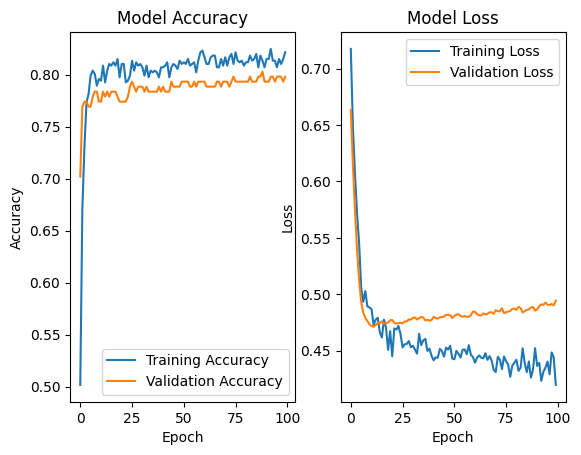

In [22]:
# Plotar a evolução da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotar a evolução das perdas
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()